>**Alumnos**: *Adrián Ogáyar Sanchez y Arturo Barbero Pérez*

>**Grupo**: *11*

# Support Vector Machines

In [1]:
#Comprobar que realmente se usan luego todas

from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp
import sklearn.svm as svm

In [2]:
datos1 = loadmat("ex6data1.mat")
datos2 = loadmat("ex6data2.mat")
datos3 = loadmat("ex6data3.mat")

datos1_x = datos1['X']
datos1_y = datos1['y']
print(datos1_x.shape)
print(datos1_y.shape)

datos2_x = datos2['X']
datos2_y = datos2['y']
print(datos2_x.shape)
print(datos2_y.shape)

datos3_x = datos3['X']
datos3_y = datos3['y']
print(datos3_x.shape)
print(datos3_y.shape)

(51, 2)
(51, 1)
(863, 2)
(863, 1)
(211, 2)
(211, 1)


In [3]:
def graficaDatos(x, y):
    plt.figure()
    
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(x[pos, 0], x[pos, 1], color='black', marker='+')
    plt.scatter(x[neg, 0], x[neg, 1], color='yellow', edgecolors='black', marker='o')

    return

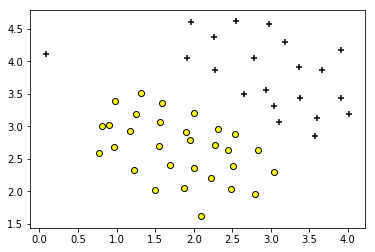

In [4]:
graficaDatos(datos1_x, datos1_y)

In [5]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(datos1_x, datos1_y.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
def generarSeparacion(clf, x):

    x1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    x2 = np.linspace(x[:, 1].min(), x[:, 1].max(), 100)
    x1, x2 = np.meshgrid(x1, x2)
    
    yp = clf.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)
    
    return (x1, x2, yp)

In [7]:
x1, x2, yp = generarSeparacion(clf, datos1_x)

In [8]:
def graficaSeparacion(x, y, x1, x2, yp):
    
    graficaDatos(x,y)
    plt.contour(x1, x2, yp)
    
    return

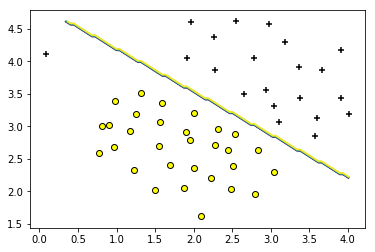

In [9]:
graficaSeparacion(datos1_x, datos1_y, x1, x2, yp)

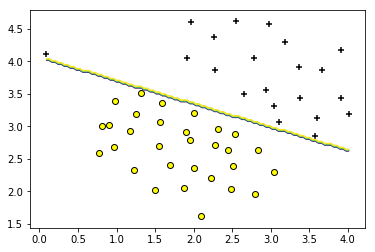

In [10]:
clf = svm.SVC(kernel='linear', C=100)

clf.fit(datos1_x, datos1_y.ravel())

x1, x2, yp = generarSeparacion(clf, datos1_x)

graficaSeparacion(datos1_x, datos1_y, x1, x2, yp)